# Deep Learning
**WIP** It is still a messy

**TODO**

1. ~Vectorization operations and loss functions~

    * ~create ones and zeros and get shape~
    * ~matrix n vector mutliplications~
    * ~reshape matrix~
    * ~How to encode one-hot~

1. ~Ho to define models~ 

    * ~Helow word simple regression~
    * ~define models with sequence~
    
1. Callbacks 
    * How to stop when reach specific acc or perfromance 
    * How to save best model during 
    * How to save models archicterue, parameters, optmizer parameters (everything) (see my code in dialects)
    * How to load saved models 
    
1. Code for main loss functions and when to use

    * binnary cross entropy
    * categorical cross entropy
    * sparse categorical cross entropy
    * mae
    * mse 

1. Learning curves 
    * Code to plot learning curves in notebook using matplotlib

1. Code to use Genrators
    * Split folders in train and val so Generators can read 
    * ImageDataGenerator with data augmentation
    * Use ImageDataGenerator to save aigmented data

refs:
* https://blog.goodaudience.com/artificial-neural-networks-explained-436fcf36e75


In [29]:
import math
import numpy as np
import h5py
import matplotlib.pyplot as plt
import tensorflow as tf

import datetime

%matplotlib inline
np.random.seed(1)

import IPython
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

print(tf.__version__)

2.6.0


## Tensor basic operations 

https://www.tensorflow.org/guide/tensor


### Create and vectorization

In [8]:
print(f"vector add: {tf.add([1, 2], [3, 4])}")
print(f"sum all elemenst: {tf.reduce_sum([1, 2, 3])}")

mymat = tf.Variable([[7],[11]], tf.int16)
print(f"mymat: {mymat.value()}")

# batch x height x width x color
batch_imgs = tf.zeros([10, 299, 299, 3])  
print(f"batch_imgs: {batch_imgs.shape}")

print()

y_hat = tf.constant(36)            # Define y_hat constant. Set to 36.
y = tf.constant(39)   

loss = tf.Variable((y - y_hat)**2)

print(f"loss: {loss.value()}")

vector add: [4 6]
sum all elemenst: 6
mymat: [[ 7]
 [11]]
batch_imgs: (10, 299, 299, 3)

loss: 9


### Reshape, stack, transpose and numpy compatibility

In [9]:
print("numpy compatibility")

ndarray = np.ones([3, 3])

print("Tensor convert to numpy")
tensor = tf.multiply(ndarray, 10)
print(f"tensor: {tensor}")

print("And Tensors converts to numpy")
print(f" add scalr to tensor and get a numpy array:  {np.add(tensor, 1)}")

print()
print("The .numpy() method explicitly converts a Tensor to a numpy array")
print(tensor.numpy())

print()
print(f"tensor ones: {tf.Variable(np.ones([3, 3]))}")

print()
print("Reshaping")

x = tf.reshape(np.array([1,2,3,4,5,6,7,8,9]), [3, 3])
print(f"x shape: {x.shape}")
print(f"x: {x.numpy()}")

# -1 means infere this dimension
y = tf.reshape(np.array([1,2,3,4,5,6,7,8,9,10,11,12]), [2, -1])
print(f"y shape: {y.shape}")
print(f"x: {y.numpy()}")

print()
print("Transpose")
# Transpose
print(f"y shape: {y.shape}")
print(f"y.T: {tf.transpose(y).shape}")


numpy compatibility
Tensor convert to numpy
tensor: [[10. 10. 10.]
 [10. 10. 10.]
 [10. 10. 10.]]
And Tensors converts to numpy
 add scalr to tensor and get a numpy array:  [[11. 11. 11.]
 [11. 11. 11.]
 [11. 11. 11.]]

The .numpy() method explicitly converts a Tensor to a numpy array
[[10. 10. 10.]
 [10. 10. 10.]
 [10. 10. 10.]]

tensor ones: <tf.Variable 'Variable:0' shape=(3, 3) dtype=float64, numpy=
array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])>

Reshaping
x shape: (3, 3)
x: [[1 2 3]
 [4 5 6]
 [7 8 9]]
y shape: (2, 6)
x: [[ 1  2  3  4  5  6]
 [ 7  8  9 10 11 12]]

Transpose
y shape: (2, 6)
y.T: (6, 2)


In [10]:
###### print("Stack or concatamete")
x = tf.constant([1, 4])
y = tf.constant([2, 5])
z = tf.constant([3, 6])

v = tf.stack([x, y, z])

print(f"v shape: {v.shape}")
print(f"v: {v.numpy()}")


v = tf.stack([x, y, z], axis=1)

print(f"v shape: {v.shape}")
print(f"v: {v.numpy()}")

v shape: (3, 2)
v: [[1 4]
 [2 5]
 [3 6]]
v shape: (2, 3)
v: [[1 2 3]
 [4 5 6]]


### Random tensors

In [11]:
# tf.random.uniform(shape, minval=0, maxval=None, dtype=tf.dtypes.float32, seed=None, name=None)
x = tf.random.uniform([5],0,10, dtype = tf.int32, seed = 0)
x.numpy()

# tf.random.normal(shape, mean=0.0, stddev=1.0, dtype=tf.dtypes.float32, seed=None, name=None)
x = tf.random.normal([4], 0, 1, tf.float32)
x.numpy()

array([1, 3, 8, 5, 3], dtype=int32)

array([ 0.29522768,  0.41140285,  1.5405939 , -2.106709  ], dtype=float32)

## Define models

### Hello word (regression)

In [2]:
# the data
# rule that We need to find is y = 2x - 1
xs = np.array([-1.0, 0.0, 1.0, 2.0, 3.0, 4.0], dtype=float)
ys = np.array([-3.0, -1.0,1.0,3.0,5.0,7.0], dtype=float)

# Define a model with one neuron
model = tf.keras.Sequential([tf.keras.layers.Dense(units=1, input_shape=[1])])

# define loss func and optimizer 
model.compile(optimizer='sgd', loss='mean_squared_error')

# train or learn the rule
model.fit(xs, ys, epochs=500, verbose=0)

print("Checking")
x = 3.0
print(f"x: {x}; expected: {2.0*x-1}; prediction: {model.predict([x])}")

print("unseen data")
x = 10.00
print(f"x: {x}; expected: {2.0*x-1}; prediction: {model.predict([x])}")

Checking
x: 3.0; expected: 5.0; prediction: [[5.000212]]
unseen data
x: 10.0; expected: 19.0; prediction: [[18.985415]]


In [3]:
?tf.keras.layers.Dense

## Encoding



* One hot encoding

https://www.tensorflow.org/api_docs/python/tf/one_hot

<img src="images/onehot.png" width="800" align="left"/>

In [4]:
from tensorflow.keras.utils import to_categorical

test_labels = tf.constant([1,2, 3, 0, 2, 1])

y = to_categorical(test_labels)
print(f"output shape: {y.shape}")

k = 4
print(f"label({k}): {test_labels[k]}; one-hot encode: {y[k,:]}")
y 

output shape: (6, 4)
label(4): 2; one-hot encode: [0. 0. 1. 0.]


array([[0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.]], dtype=float32)

In [5]:
indices = [0, 1, 2]
depth = 3

# ?tf.one_hot
tf.one_hot(indices, depth)  # output: [3 x 3]

<tf.Tensor: shape=(3, 3), dtype=float32, numpy=
array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]], dtype=float32)>

## Loss and metrics 

ref: https://www.tensorflow.org/api_docs/python/tf/keras/metrics

### MAE and MSE


In [6]:
y_true = np.array([1  ,0, 1, 0])
y_pred = np.array([0.5,0, 1, 0])

mse = tf.keras.losses.MSE(y_true, y_pred).numpy()
mae = tf.keras.losses.MAE(y_true, y_pred).numpy()

print(f"mse: {mse}")
print(f"mae: {mae}")


mse: 0.0625
mae: 0.125


### Cross entropy



```python

# binary 
tf.keras.losses.binary_crossentropy(
    y_true, y_pred, from_logits=False, label_smoothing=0
)
```

* binary cross entropy

$
- \frac{1}{m}  \sum_{i = 1}^m  \large ( \small y^{(i)} \log (\hat{y}^{(i)}) + (1-y^{(i)})\log (1-\hat{y}^{(i)} \large ) \small\tag{1}
$


In [ ]:
y_true = tf.constant([1,0, 1, 0])

# y_pred must be float because it means probabilities
y_pred = tf.constant([0.3,0, 0.9, 0])

_loss = tf.keras.losses.binary_crossentropy(y_true, y_pred)

print(f"loss: {_loss}")


```python
# categorical crossentropy
tf.keras.losses.categorical_crossentropy(
    y_true, y_pred, from_logits=False, label_smoothing=0
)

# sparse
tf.keras.losses.sparse_categorical_crossentropy(
    y_true, y_pred, from_logits=False, axis=-1
)

# Use the loss function (approx. 1 line)
cost = tf.nn.sigmoid_cross_entropy_with_logits(logits=z, labels=y)

```


In [ ]:
## TODO needs to be reviewed 
y_true = to_categorical(tf.constant([1,0, 1, 0]))

# y_pred must be float because it means probabilities
y_pred = to_categorical(tf.constant([0.3,0, 0.9, 0]))

_loss = tf.keras.losses.categorical_crossentropy(y_true, y_pred)

print(f"loss: {_loss}")

In [ ]:
## TODO needs to be reviewed 
y_true = tf.constant([1,2, 1, 0])



# y_pred must be float because it means probabilities
y_pred = tf.constant([ [0.0,0.9, 0.1],
                       [0.0,0.3, 0.7],
                       [0.5,0.9, 0.5],
                       [0.7,0.1, 0.2]
                     ])

y_pred.shape
y_pred

_loss = tf.keras.losses.categorical_crossentropy(y_true,y_pred)

print(f"loss: {_loss}")


* sigmoid_cross_entropy_with_logits

```python

# Use the loss function (approx. 1 line)
cost = tf.nn.sigmoid_cross_entropy_with_logits(logits=z, labels=y)

```

$
- \frac{1}{m}  \sum_{i = 1}^m  \large ( \small y^{(i)} \log \sigma(z^{[2](i)}) + (1-y^{(i)})\log (1-\sigma(z^{[2](i)})\large )\small\tag{2}
$




## Layers: 

 Understanding and Debbuging

### Convolution 

Output:
  
$
W_o = \frac{(W_i + P_w  - K_w)}{S_w} + 1
$

where:

* $W_i$: input image width
* $P_w$: padding, the total number of elements to add in top and botton of the input image
* $K_w$: kernell width
* $S_w$: stride width. number of elements to hop 


> PS: To check just make $K_w = 1$, $P_w = 0$ and  $S_w = 1$, we expecting same image size.  
> PS: To remember: Should be proportional to $W_i, P_w$ and $K_w, S_w$ should reduce the output size   
> PS: You only need to check in one dimension  
> PS: Run the formula for one small dim image like 1x3, and kernel 1x2 and 1x1 and S_w 1 and 2  

The eqation is similar for the output height $H_o$.

In [16]:
X = np.array([range(10),range(10)])
X[1,:] = X[1,:] + 1 
X = np.reshape(X,(2,10,1)) # bs = 2
X.shape
X

X[0,:,:].shape
X[0,:,:].T

(2, 10, 1)

array([[[ 0],
        [ 1],
        [ 2],
        [ 3],
        [ 4],
        [ 5],
        [ 6],
        [ 7],
        [ 8],
        [ 9]],

       [[ 1],
        [ 2],
        [ 3],
        [ 4],
        [ 5],
        [ 6],
        [ 7],
        [ 8],
        [ 9],
        [10]]])

(10, 1)

array([[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]])

In [19]:
print("Conv1d")

_kernel_init_coefs = np.array([-1, 0, 1])
_kernel_init_coefs = tf.initializers.constant(_kernel_init_coefs)

# Rememember the output of a conv layer change the output size
# conv 1d: Output size = 1 + (in size + padding size - kernel size)/(stride size)

# H W C 
X.shape

in_size = X.shape[1]
pad_size = 0
kernel_size = 3
stride_size = 1
w_size = ( in_size + pad_size - kernel_size)/(stride_size) + 1  # w direction
h_size = 1
out_size = (w_size, h_size)

print(f"Expected output size: {out_size}")
model3 = tf.keras.Sequential([
        tf.keras.layers.Conv1D(1, kernel_size=3, kernel_initializer= _kernel_init_coefs, input_shape=(10,1) )
    ])

model3.summary()
y3 = model3.predict(X)
y3.shape

X.T

# Expected all 2 values because: 
# 0*-1 + 1*0 + 2*1 = 2
# 1*-1 + 2*0 + 3*1 = 2
# 2*-1 + 3*0 + 4*1 = 2
# ...
# 7*-1 + 8*0 + 9*1 = 2
y3.T

Conv1d


(2, 10, 1)

Expected output size: (8.0, 1)
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 8, 1)              4         
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


(2, 8, 1)

array([[[ 0,  1],
        [ 1,  2],
        [ 2,  3],
        [ 3,  4],
        [ 4,  5],
        [ 5,  6],
        [ 6,  7],
        [ 7,  8],
        [ 8,  9],
        [ 9, 10]]])

array([[[2., 2.],
        [2., 2.],
        [2., 2.],
        [2., 2.],
        [2., 2.],
        [2., 2.],
        [2., 2.],
        [2., 2.]]], dtype=float32)

### Pooling

* GlobalAveragePooling1D and MaxPool1D

    * https://www.tensorflow.org/api_docs/python/tf/keras/layers/GlobalAveragePooling1D
    * https://www.tensorflow.org/api_docs/python/tf/keras/layers/MaxPool1D
    * https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv1D

```python
tf.keras.layers.MaxPool1D(
    pool_size=2, strides=None, padding='valid', data_format='channels_last',
    **kwargs
)


# filters is the number of neurons
tf.keras.layers.Conv1D(
    filters, kernel_size, strides=1, padding='valid', data_format='channels_last',
    dilation_rate=1, activation=None, use_bias=True,
    kernel_initializer='glorot_uniform', bias_initializer='zeros',
    kernel_regularizer=None, bias_regularizer=None, activity_regularizer=None,
    kernel_constraint=None, bias_constraint=None, **kwargs
)

```

In [10]:
print("GlobalAveragePooling1D")
model1 = tf.keras.Sequential([
        tf.keras.layers.GlobalAveragePooling1D(input_shape=(10,1) )
    ])

model1.summary()
y1 = model1.predict(X)
y1.shape
y1.T

print()
print("MaxPool1D")

model2 = tf.keras.Sequential([
        tf.keras.layers.MaxPool1D(pool_size=2, input_shape=(10,1) )
    ])

model2.summary()
y2 = model2.predict(X)
y2.shape

y2.T

GlobalAveragePooling1D
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
global_average_pooling1d (Gl (None, 1)                 0         
Total params: 0
Trainable params: 0
Non-trainable params: 0
_________________________________________________________________


(2, 1)

array([[4.5, 5.5]], dtype=float32)


MaxPool1D
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
max_pooling1d (MaxPooling1D) (None, 5, 1)              0         
Total params: 0
Trainable params: 0
Non-trainable params: 0
_________________________________________________________________


(2, 5, 1)

array([[[ 1.,  2.],
        [ 3.,  4.],
        [ 5.,  6.],
        [ 7.,  8.],
        [ 9., 10.]]], dtype=float32)

### Custom (lambda) Layer

In [11]:
def custom_layer(x):
    
    tensor = tf.reduce_mean(x,axis=1)
        
    return tensor


print(f"Implementing with Lambda Layer")
model2 = tf.keras.Sequential([
        tf.keras.layers.Input(shape=(10,1), name="input_layer"),
        tf.keras.layers.Lambda( lambda x: custom_layer(x)  )
    ])


model2.summary()

X.shape
#X

y2 = model2.predict(X)
y2.shape
y2.T


Implementing with Lambda Layer
Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lambda (Lambda)              (None, 1)                 0         
Total params: 0
Trainable params: 0
Non-trainable params: 0
_________________________________________________________________


(2, 10, 1)

(2, 1)

array([[4.5, 5.5]], dtype=float32)

In [12]:
def stat_pooling_layer(x):
    
    tensor_std = tf.math.reduce_std(x,axis=1)
    tensor_mean = tf.reduce_mean(x,axis=1)
    
    tensor = tf.concat([tensor_mean, tensor_std], axis=1)
    
    return tensor

# batch size = 2, max seq = 4, mfcc dim = 3
X1 = tf.constant([[[1, 2,3], [1,2, 4], [1, 2, 5], [2, 2, 1]]])
X2 = tf.constant([[[2, 3,4], [2,2, 4], [2, 2, 5], [3, 2, 1]]])

V = tf.concat([X1,X2], axis=0)

print(f"v shape: {V.shape}")

print(f"Implementing with Lambda Layer")
model2 = tf.keras.Sequential([
        tf.keras.layers.Input(shape=(4,3), name="input_layer"),
        #tf.keras.layers.Lambda( lambda x: tf.math.reduce_std(x,axis=1) )
        tf.keras.layers.Lambda( lambda x: stat_pooling_layer(x)  )
    ])

model2.summary()
y2 = model2.predict(V)
y2.shape


# For computing the std for double checking
# mfccs = [3,4,5,1]
# np.mean(mfccs)
# np.std(mfccs)
# Expected first sequence: Mean = [ 1.25, 2.0, 3.25 ] std = [.433, 0.0, 1.4790 ]
# y2[0,:,:] =  [ 3 means, 3 stds]
y2[0,:] 

print()
y2

v shape: (2, 4, 3)
Implementing with Lambda Layer
Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lambda_1 (Lambda)            (None, 6)                 0         
Total params: 0
Trainable params: 0
Non-trainable params: 0
_________________________________________________________________


(2, 6)

array([1.25     , 2.       , 3.25     , 0.4330127, 0.       , 1.47902  ],
      dtype=float32)

array([[1.25     , 2.       , 3.25     , 0.4330127, 0.       , 1.47902  ],
       [2.25     , 2.25     , 3.5      , 0.4330127, 0.4330127, 1.5      ]],
      dtype=float32)

### Batch normalization

* Input are the values of x over a batch: $X = {x_1, x_2,..., x_i,..., x_m}$
    * where $m$ is the batch size
* Output: $y = BN_{\gamma,\beta}(X)$
* Learning parameters: $\gamma$ and $\beta$
* Normalization:

$
\mu_B = \frac{1}{m} \sum_{i=1}^m x_i \\
\sigma_B^2 = \frac{1}{m} \sum_{i=1}^m (x_i - \mu_B)^2 \\
z_i = \frac{x_i - \mu_B}{\sqrt{\sigma^2_B + \epsilon}} \\
y_i = BN_{\gamma,\beta}(x_i) \equiv \gamma z_i + \beta
$


In [10]:
# Batch
X = np.random.uniform(0,5.0,size=(10))
X

print(f"shape: {X.shape}; mean: {X.mean():.2f}; std: {X.std():.2f}")

# Coputing using tensorflow layer
gamma = 1.0
beta = 0.0
epsilon = 0.0

# because we did not train the layer, we are passing the mean and the variance of the batch
Y = tf.nn.batch_normalization(X,
                    mean = X.mean(axis=0),        # batch mean
                    variance = X.var(axis=0),     # batch var
                    offset = beta,scale = gamma,  # batch beta and gamma See equations  
                    variance_epsilon = epsilon)   # batch epsilon See equations

Y.numpy()

# comparing with numpy

Z = (X - X.mean(axis=0))/np.sqrt(X.var(axis=0) + epsilon)
Y = gamma * Z + beta
Y

# Expectd zero mean and unit variance
print(f"shape: {Y.shape}; mean: {Y.mean():.2f}; std: {Y.std():.2f}")

array([4.00372284, 4.84130788, 1.56712089, 3.46161308, 4.38194576,
       4.47303332, 0.42522106, 0.19527392, 0.8491521 , 4.39071252])

shape: (10,); mean: 2.86; std: 1.78


array([ 0.64399874,  1.11517084, -0.72667862,  0.33904225,  0.85676291,
        0.90800298, -1.36903888, -1.49839253, -1.13056223,  0.86169453])

array([ 0.64399874,  1.11517084, -0.72667862,  0.33904225,  0.85676291,
        0.90800298, -1.36903888, -1.49839253, -1.13056223,  0.86169453])

shape: (10,); mean: 0.00; std: 1.00


###  Analyze the output of the Layers

How to debbug and inspect the output of each layer of the NN.

In [27]:
from tensorflow.keras import models

X = np.array([range(3)])
X = np.reshape(X,(1,3,1)) # bs = 1 SGD
X.shape
X.T


_kernel_init_coefs = np.array([-1, 1])
_kernel_init_coefs = tf.initializers.constant(_kernel_init_coefs)

model = tf.keras.Sequential([
        tf.keras.layers.Conv1D(1, kernel_size=2, kernel_initializer= _kernel_init_coefs, input_shape=(3,1) ),
        tf.keras.layers.MaxPool1D(pool_size=2),
        tf.keras.layers.GlobalAveragePooling1D()
    ])

model.summary()

layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)

#layer_outputs
activations = [X]

A = activation_model.predict(X)
print(f"len of list of activations: {len(A)}")
for l in range(3):
    
    print(f"Layer: {l}")
    a = A[l]
    print(f"output shape: {a.shape}")
    print(f"Activation at layer {l}: {a.T}")


(1, 3, 1)

array([[[0],
        [1],
        [2]]])

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_12 (Conv1D)           (None, 2, 1)              3         
_________________________________________________________________
max_pooling1d_12 (MaxPooling (None, 1, 1)              0         
_________________________________________________________________
global_average_pooling1d_12  (None, 1)                 0         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________
len of list of activations: 3
Layer: 0
output shape: (1, 2, 1)
Activation at layer 0: [[[1.]
  [1.]]]
Layer: 1
output shape: (1, 1, 1)
Activation at layer 1: [[[1.]]]
Layer: 2
output shape: (1, 1)
Activation at layer 2: [[1.]]


## (Review) Optmize a function

Why this example is converging? y_train does not match true model

https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Optimizer

In [101]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

 
x_train = [1,2,3]
y_train = [1,2,3]

W = tf.Variable(tf.random.normal([1]), name = 'weight')
b = tf.Variable(tf.random.normal([1]), name = 'bias')

W = tf.Variable([2.0], name = 'weight')
b = tf.Variable([1.0], name = 'bias')

hypothesis = W*x_train+b


print(f"W: {W.numpy()}; b: {b.numpy()}")
print(f"true y: {hypothesis.numpy()}")
print(f"y_train: {y_train}")
print(f"error: {y_train -  hypothesis.numpy()}")

@tf.function
def cost():

    y_model = W*x_train+b
    
    error = tf.reduce_mean(tf.square(y_train- y_model))
    return error


optimizer = tf.optimizers.SGD(learning_rate=0.02)

train = optimizer.minimize(cost,var_list=[W, b])

tf.print(W)
tf.print(b)

W: [2.]; b: [1.]
true y: [3. 5. 7.]
y_train: [1, 2, 3]
error: [-2. -3. -4.]
[1.73333335]
[0.88]


In [99]:
?tf.optimizers.SGD.minimize

```sh
pip install --upgrade tensorflow-probability
```

In [79]:
import tensorflow as tf
import  tensorflow_probability as tfp

x = tf.Variable(2.0)

# loss_fn = lambda: (x - 1)*(x-2)  # <== NOT working 
loss_fn = lambda: x**2 - 3*x + 2  # (x-1)(x-2)  <== return (1+2)/2 = 1.5 !?
loss_fn = lambda: (x - 5)**2   # <== this work 


losses = tfp.math.minimize(loss_fn,
                           num_steps=500,
                           optimizer=tf.optimizers.SGD(learning_rate=0.1))

# In TF2/eager mode, the optimization runs immediately.
print("optimized value is {} with loss {}".format(x, losses[-1]))

optimized value is <tf.Variable 'Variable:0' shape=() dtype=float32, numpy=4.999999> with loss 9.094947017729282e-13


## Perceptron

In [138]:
# TODO: Add code form intro_to_gradients.ipynb
from sklearn.datasets import make_regression
from scipy import stats 

# Simulating data
n_samples = 50 
X, y, coefs = make_regression(n_samples = n_samples, 
                       n_features=1, # Regression with 1 features has 2 parameters \theta_1,\theta_0  
                       n_informative=1, 
                       noise=1,
                       coef=True, # <= mean do not return true coefs
                       random_state=1)

X.min()
X.max()

# normalize inputs: [-1.0, 1.0]
#  np.interp: pice-wise linear interpolation
X = np.interp(X, (X.min(), X.max()), (-1.0, 1.0))

X.min()
X.max()

X.shape
X[0:3]

y.shape

x = X.flatten()
slope, intercept,_,_,_ = stats.linregress(x,y)
print(f"Expected: slope: {slope}; b: {intercept}")

init_guess = np.array([15, 260])

W0 = tf.constant_initializer(init_guess[1])
b0 = tf.constant_initializer(init_guess[0])

model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation='linear',
                          kernel_initializer=W0,
                          bias_initializer=b0,
                          input_shape=(1,))
])

model.summary()


sgd = tf.keras.optimizers.SGD(learning_rate=0.1, 
                              momentum=0.0,
                              nesterov=False, name='SGD'
                             )

model.compile(loss='mse', optimizer=sgd, metrics=['mse'])

print('lr: {}'.format(model.optimizer.lr.numpy()))

model.optimizer.get_config()

-2.3015386968802827

2.100255136478842

-1.0

1.0

(50, 1)

array([[-0.06757636],
       [ 0.13247202],
       [-0.26493112]])

(50,)

Expected: slope: 198.35337069726145; b: -8.851783526295746
Model: "sequential_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________
lr: 0.10000000149011612


{'name': 'SGD',
 'learning_rate': 0.1,
 'decay': 0.0,
 'momentum': 0.0,
 'nesterov': False}

In [148]:
history = model.fit(X, y, epochs=100, batch_size=1, verbose=0, validation_split=0.0)

In [149]:
b, W = model.get_weights()

print(f"Expected: slope: {slope}; b: {intercept}")
print(f"Estimated parameters: b = {b} W = {W}")


Expected: slope: 198.35337069726145; b: -8.851783526295746
Estimated parameters: b = [[198.3256]] W = [-8.987243]


{'verbose': 2, 'epochs': 100, 'steps': 50}

dict_keys(['loss', 'mse'])

Index(['loss', 'mse'], dtype='object')

min loss value: loss    0.666593
dtype: float64


<AxesSubplot:>

Text(0.5, 1.0, 'MSE Per EPOCH')

Text(0.5, 0, 'EPOCH')

Text(0, 0.5, 'MSE')

(0.0, 5.0)

(0.0, 30.0)

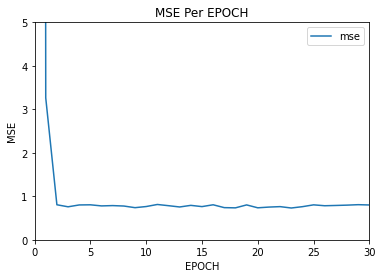

In [145]:
import pandas as pd

model.history.params
model.history.history.keys()

metric_df = pd.DataFrame(model.history.history)
metric_df.columns

print(f"min loss value: {metric_df[['loss']].min()}")

metric_df[['mse']].plot()
plt.title('MSE Per EPOCH')
plt.xlabel('EPOCH')
plt.ylabel('MSE')
plt.ylim(0.0,5.0)
plt.xlim(0.0,30)
plt.show()

In [103]:
? np.interp

## Train 


### Notes 



ref:
* https://datascience.stackexchange.com/questions/29719/how-to-set-batch-size-steps-per-epoch-and-validation-steps


* train_size  = batch_size x steps_per_epochs (very important to match to utilize all samples in train dataset)
* val_size  = batch_size x validation_steps

**Recipe**

1. Overfit a toy train dataset: (check code)
    * Consider overfit subset of the classes or labels for multiclass and multilabel classifiers
    * Consider overfitt all classses or labels
    
1. Reduce bias
    * Set a goal: train mse < 0.01 or train acc > 0.90
    * Consider train longer as possible
    * Change architecture parameters

1. Tune learning rate (keep constant #epochs)
    * Run the experiment with small number of epochs first to have an idea of the ranges
        * Try to determine the larges lr posiible (The loss will not explode) 
    * Run with small number of lr candidates and epochs
    * Leave running during the night (train longer)
    
1. Reduce variance (keep constant #epochs)


### Load model checkpoint


In [ ]:
def _load_check_point(keras_model, chk_path, _epoch):
    
    checkpoint_path2 = "checkpoints/20200514_0/keras_xv_model-0100.ckpt"
    checkpoint_dir2 = os.path.dirname(checkpoint_path2)

    print(f"load checkoint in folder: {checkpoint_dir2}")
    
    (loss, mae) = keras_model.evaluate(x = X_train_mfcc2,y = xv_train, verbose=0)

    # Check if initialize NN parameters with the parameters checkpoints
    print ("Before load loss = " + str(loss))

    keras_model.load_weights(checkpoint_path2.format(epoch=_epoch))

    (loss, mae) = keras_model.evaluate(x = X_train_mfcc2,y = xv_train, verbose=0)

    print ("After load loss = " + str(loss))
        
    return keras_model

ref: Explain how to change learning rate after load parameters
* https://www.pyimagesearch.com/2019/09/23/keras-starting-stopping-and-resuming-training/

```python
# load the checkpoint from disk
print("[INFO] loading {}...".format(args["model"]))

model = load_model(args["model"])

# update the learning rate
print("[INFO] old learning rate: {}".format(
		K.get_value(model.optimizer.lr)))

K.set_value(model.optimizer.lr, 1e-2)
print("[INFO] new learning rate: {}".format(
		K.get_value(model.optimizer.lr)))
```

### Train

In [ ]:
model_number = '_1' + '/'

checkpoint_dir = "checkpoints/" + \
            datetime.datetime.now().strftime("%Y%m%d") + model_number

checkpoint_path = checkpoint_dir + "model-{epoch:04d}.ckpt"
checkpoint_dir

!mkdir -p {checkpoint_dir}

# Create checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(checkpoint_path,
                                                 save_weights_only=True,
                                                 monitor='val_loss',
                                                 mode='min',
                                                 verbose=1, 
                                                 save_frequency = 10) # save every 5 epochs


loss_name = 'MSE'
metric_name = 'MAE'
def build_model(max_seq_len, dimension):

    model = tf.keras.Sequential([
        tf.keras.layers.Conv1D(512, 5, activation='linear', input_shape=(max_seq_len, dimension)),
        tf.keras.layers.MaxPooling1D(pool_size=3),
        tf.keras.layers.Conv1D(256, 3, strides=2 ,activation='linear'),
        tf.keras.layers.MaxPooling1D(pool_size=3),
        tf.keras.layers.Conv1D(128, 3,strides=3, activation='linear'),
        tf.keras.layers.GlobalAveragePooling1D(),
        tf.keras.layers.Dense(128, activation='relu'),
        #tf.keras.layers.Dropout(0.4),
        tf.keras.layers.Dense(512, activation='linear',name='xvectors')
    ])
    
    return model

In [ ]:
dimension = 23

#special_value = 99.0
max_seq_len = X_train_mfcc2.shape[1]

model = build_model(max_seq_len,dimension)

print('X_train shape:{}'.format(X_train_mfcc2.shape))
print('X_val shape:{}'.format(X_val_mfcc2.shape))
print('y_train shape:{}'.format(xv_train.shape))
print('y_val shape:{}'.format(xv_val.shape))
print('#frame trimmed: {}'.format(max_seq_len))
print('#mfcc: {}'.format(dimension))
print('checkpoint: {}'.format(checkpoint_path))
#print('logs: {}'.format(log_dir))
#print('batch size: {}'.format(BATCH_SIZE))
print('loss: {}'.format(loss_name))
print('metric: {}'.format(metric_name))

model.summary()

In [ ]:
_adam_opt = K.optimizers.Adam(lr=0.001)
model.compile(loss=loss_name, optimizer=_adam_opt, metrics=[metric_name])

print('lr: {}'.format(model.optimizer.lr.numpy()))

model.optimizer.get_config()

In [ ]:
%%time

EPOCHS = 3

history = keras_model.fit(X_train_mfcc2, xv_train,
                 epochs=EPOCHS,
                 steps_per_epoch=30, 
                 #batch_size=BATCH_SIZE,
                 validation_data = (X_val_mfcc2, xv_val),
                 #validation_steps=VALIDATION_STEPS,
                 callbacks = [cp_callback]
                )

### Learning curve diagnostics


In [ ]:
# Check learning curves

metric_df = pd.DataFrame(keras_model.history.history)
metric_df.columns

print(f"min loss value: {metric_df[['loss']].min()}")

metric_df[['loss', 'val_loss']].plot()
plt.title('Loss & MAE Per EPOCH')
plt.xlabel('EPOCH')
plt.ylabel('loss or mae')
#plt.ylim(0.0,1.0)
plt.show()

In [ ]:
# Estimation how many epochs do you need and how long is going to take

def _estimate_delta_loss(loss, start_epoch, end_epoch, n_smooth):
    
    # loss 
    bg = start_epoch - n_smooth
    ed = start_epoch
    loss_start = np.mean(loss[bg:ed]) # /6.0
    
    bg = end_epoch - n_smooth
    ed = end_epoch
    loss_end = np.mean(loss[bg:ed]) # /6.0
    
    delta = loss_end - loss_start
    
    return delta

start_epoch = 200
end_epoch = 300
n_smooth = 6

delta_loss = _estimate_delta_loss(loss0, start_epoch, end_epoch, n_smooth)
delta_val_loss = _estimate_delta_loss(val_loss0, start_epoch, end_epoch, n_smooth)
delta_epoch = end_epoch - start_epoch

print(f"delta loss: {delta_loss:.4f} every {delta_epoch}")
print(f"delta val: {delta_val_loss:.4f} every {delta_epoch}")


total_time_in_hour = 3*60 + 5

total_epoch = 2 * 300
time_per_100epoch = total_time_in_hour*100/total_epoch

print()
print(f"Simple estimation")
for _epoch in [200, 250, 300, 600, 1000, 1500, 2000]:
    
    time_est = _epoch/100 * time_per_100epoch
    loss_est = delta_loss/delta_epoch * _epoch + loss0[start_epoch]
    val_est = delta_val_loss/delta_epoch * _epoch + val_loss0[start_epoch]
    
    print(f"epoch: {_epoch}; expected loss: {loss_est:.3f}; expected val loss: {val_est:.3f} takes: {time_est:.2f} m;")

### Tune learning rate 

https://www.pyimagesearch.com/2019/08/05/keras-learning-rate-finder/

* lr ranges: 1e-10 - 1e-1

<img src="images/keras_learning_rate_finder_algorithm.png" style="float:left" width="300" align="right">

<img src="images/learing_rate_finder_lr_plot.png" style="float:left" width="500" align="right">


In [ ]:
EPOCHS = 50

start_lr = 1e-4
number_of_lr_per_order = 15
    
lrs = start_lr*(10**(np.arange(EPOCHS - 1) / number_of_lr_per_order))

end_lr = lrs[-1]

print(f"Learning rate search space: start: {lrs[0]}; end: {end_lr:.3f} ")
print(f"Searching {number_of_lr_per_order} per magnitude order")

plt.plot(lrs, 'o--')
plt.title('Learning Rate search space');
plt.ylabel('learning rate');
plt.xlabel('epoch');

plt.figure()
plt.semilogy(lrs, 'o--')
plt.title('Learning Rate search space');
plt.ylabel('learning rate');
plt.xlabel('epoch');

In [ ]:
# After training
_loss = history.history["loss"]

print(f"Checking dimensions matches: lrs: {len(lrs)}; len history: {_loss}")

# x =  lr and y = loss
plt.semilogx(lrs,_loss ,'o--' )
#plt.axis([start_lr, end_lr, 0, 5])

lrs[5:10]
_loss[5:10]

In [ ]:
%%time
# Checking lr candidates

EPOCHS = 55

lr_candidates = [ 0.01, 0.006,0.001, 0.00045 ]

lr_curves = list()
for lr in lr_candidates:
    
    print(f"Training with lr: {lr}")
    model = xv_model(max_seq_len,dimension)
    
    _adam_opt = K.optimizers.Adam(lr=lr)
    model.compile(loss=loss_name, optimizer=_adam_opt, metrics=[metric_name])


    history = model.fit(X_train_mfcc2, xv_train,
                 epochs=EPOCHS,
                 steps_per_epoch=100, #EVALUATION_INTERVAL,
                 #batch_size=BATCH_SIZE,
                 validation_data = (X_val_mfcc2, xv_val),
                 #validation_steps=VALIDATION_STEPS
                )
    
    lr_curves.append((lr, history.history["loss"], history.history["val_loss"]  ))
    print()

In [ ]:
# Ploting the results
epochs = range(EPOCHS)

for lr, loss, val_loss in lr_curves:
    
    print(f"lr: {lr}; loss size: {len(loss)}; start: {loss[0]:.3f}; end: {loss[-1]:.3f}; epoch size: {len(epochs)}")
    
    _ = plt.plot(epochs,loss,  label='lr: {}'.format(lr));


_ = plt.title('Learning curves');
_ = plt.ylabel('loss');
_ = plt.xlabel('epoch');
#_ = plt.ylim(0.0,1.5)
_ = plt.legend();

### Continue train from checkpoint (transfer learning)

* If you load an external model can be transfer learning tehcnique
* Ability to change the learning rate or optmizer and start train from the last checkpoint


### Review this code



- **Training set**: 1080 pictures (64 by 64 pixels) of signs representing numbers from 0 to 5 (180 pictures per number).
- **Test set**: 120 pictures (64 by 64 pixels) of signs representing numbers from 0 to 5 (20 pictures per number).


In [ ]:
def load_dataset():
    
    train_dataset = h5py.File('data/train_signs.h5', "r")
    
    train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # your train set features
    train_set_y_orig = np.array(train_dataset["train_set_y"][:]) # your train set labels

    test_dataset = h5py.File('data/test_signs.h5', "r")
    test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # your test set features
    test_set_y_orig = np.array(test_dataset["test_set_y"][:]) # your test set labels

    classes = np.array(test_dataset["list_classes"][:]) # the list of classes
    
    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))
    
    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes

X_train_orig, Y_train_orig, X_test_orig, Y_test_orig, classes = load_dataset()

In [ ]:
Y_train_orig.shape

type(Y_train_orig)

Y_train_orig[0,0:5]

In [ ]:
print(np.shape(classes))
print(classes)

# See example of image
index = 0
plt.imshow(X_train_orig[index])
print ("y = " + str(np.squeeze(Y_train_orig[:, index])))

* preprocessing the images

In [ ]:
def convert_to_one_hot(Y, C):
    Y = np.eye(C)[Y.reshape(-1)].T
    return Y

# Flatten the training and test images
X_train_flatten = X_train_orig.reshape(X_train_orig.shape[0], -1).T
X_test_flatten = X_test_orig.reshape(X_test_orig.shape[0], -1).T

# Normalize image vectors
X_train = X_train_flatten / 255.
X_test = X_test_flatten / 255.

# Convert training and test labels to one hot matrices
Y_train = convert_to_one_hot(Y_train_orig, 6)
Y_test = convert_to_one_hot(Y_test_orig, 6)

print("number of training examples = " + str(X_train.shape[1]))
print("number of test examples = " + str(X_test.shape[1]))

print()
print('64*64*3 = 12288')
print("X_train shape: " + str(X_train.shape))
print("Y_train shape: " + str(Y_train.shape))
print("X_test shape: " + str(X_test.shape))
print("Y_test shape: " + str(Y_test.shape))

print()
print ("Y_test (1st 5) = \n" + str(np.squeeze(Y_test[:,0:5])))

## Convolutional (TODO)

In [ ]:
from datasets import flowers